## Composite analysis with Monte Carlo methods: an example with cosmic rays and clouds##

IPython notebook supporting a [research paper](http://www.swsc-journal.org/articles/swsc/pdf/2013/01/swsc130020.pdf) of the same name, published in the Journal of Space Weather and Space Climate, in 2013, doi: 10.1051/swsc/2013051. Originally, the work was supported by [IDL code](http://www.files.benlaken.com/documents/Laken_Calogovic_2013/), replaced by this code.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Read in data ### 
Read the lists of data, including a second file indicating the date

In [2]:
data = pd.read_csv("Data/Data.csv")

In [3]:
# Read original Date data
date_fix = pd.read_csv("Data/dt_index.csv")
# Convert it to a dattime list
date_list = []
for entry in zip(date_fix['yyyy'],date_fix['mm'],date_fix['dd']):
    date_list.append(pd.datetime(*entry).date())
# set the date list as the dataframe index
df = data.set_index(np.array(date_list))

Description of data:
  * cld:  Daily globally averaged ISCCP D1 V13 data (IR-detected cloud cover). Originally downloaded from NASAs EOSWEB site.
  * cld_360smth:  the isccp variable with a 360-day box-car filter and edge (+-150day) truncation
  * cld_360anm: Daily values subtracted from the 360-day box-car filter
  * cld_21smth: a 21-day box-car filter on the cld dataset with edge truncation
  * cld_21anom: isccp subtracted from smth21 
  * CRF: cosmic ray flux data, derrived using moscow/climate neutron monitors from Laken et al. 2012
  * CRF_21smth: CRF data with 21-day box-car filter and edge truncation
  * CRF_21anom: CRF anomaly, calculated by subtracting CRF from CRF_21smth

In [7]:
df.head()

,cld,cld_360smth,cld_anm360,cld_21smth,cld_anm21,CRF,CRF_21smth,CRF_21anm
1983-07-01,59.7011,-999,-999,-999,-999,-6.27740,-999,-999
1983-07-02,59.9397,-999,-999,-999,-999,-5.86313,-999,-999
1983-07-03,60.2840,-999,-999,-999,-999,-5.54581,-999,-999
1983-07-04,58.8063,-999,-999,-999,-999,-5.12461,-999,-999
1983-07-05,58.4176,-999,-999,-999,-999,-4.97488,-999,-999


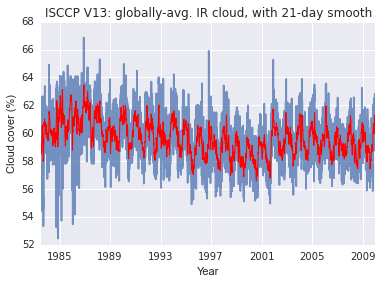

In [17]:
plt.plot(df.index[df['cld'] > -99.],df['cld'][df['cld'] > -99.], alpha=0.75)
plt.plot(df.index[df['cld_21smth'] > -99.],
         df['cld_21smth'][df['cld_21smth'] > -99.],'r', lw= 1.0)
plt.title("ISCCP V13: globally-avg. IR cloud, with 21-day smooth")
plt.xlabel("Year")
plt.ylabel("Cloud cover (%)")